# Exploratory Data Analysis & Preprocessing

This notebook performs exploratory data analysis (EDA) on the raw training dataset to understand
the distribution of property prices, key feature relationships, and geographic patterns.

The insights derived here guide feature selection, model choice, and motivate the integration
of satellite imagery for capturing neighborhood level context.

## 1. Loading the Raw Training Dataset

We begin by loading the raw housing dataset containing property attributes, geographic coordinates,
and historical sale prices. This dataset serves as the foundation for both tabular and multimodal modeling.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("../data/raw/train.csv")

In [2]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


The dataset contains a mix of:
- Structural features (e.g., square footage, bedrooms, bathrooms)
- Quality indicators (e.g., condition, grade)
- Geographic coordinates (latitude and longitude)
- Target variable: property sale price

## 2. Dataset Structure and Data Types

We inspect the dataset structure to understand feature types, detect missing values,
and ensure data consistency before analysis.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [4]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Summary statistics indicate a wide range of property prices and feature values,
suggesting the presence of outliers and non uniform distributions.
This motivates careful preprocessing and robust modeling techniques.

## 3. Target Variable Analysis: Property Prices

Understanding the distribution of the target variable is critical for choosing
appropriate modeling strategies and transformations.

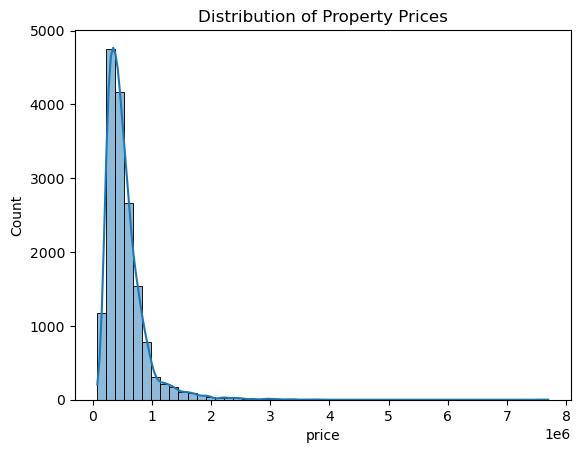

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train["price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.show()

The raw price distribution is heavily right skewed, with a small number of very
high priced properties. Such skewness can negatively impact model stability if left unaddressed.

To mitigate skewness and stabilize variance, we examine the log transformed price distribution.

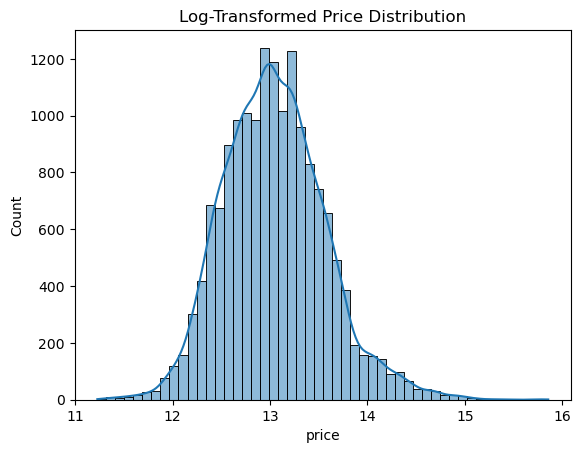

In [6]:
import numpy as np

sns.histplot(np.log1p(train["price"]), bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

After log transformation, the price distribution becomes significantly more symmetric,
making it more suitable for regression modeling and error minimization.

## 4. Feature-Target Relationships

We analyze how key structural and quality related features relate to property prices.

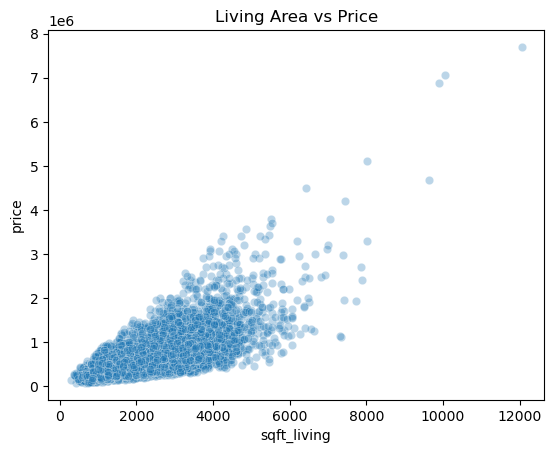

In [7]:
sns.scatterplot(
    x="sqft_living",
    y="price",
    data=train,
    alpha=0.3
)
plt.title("Living Area vs Price")
plt.show()

Construction grade reflects the overall build quality and design of a property.
We expect this feature to have a strong influence on price.

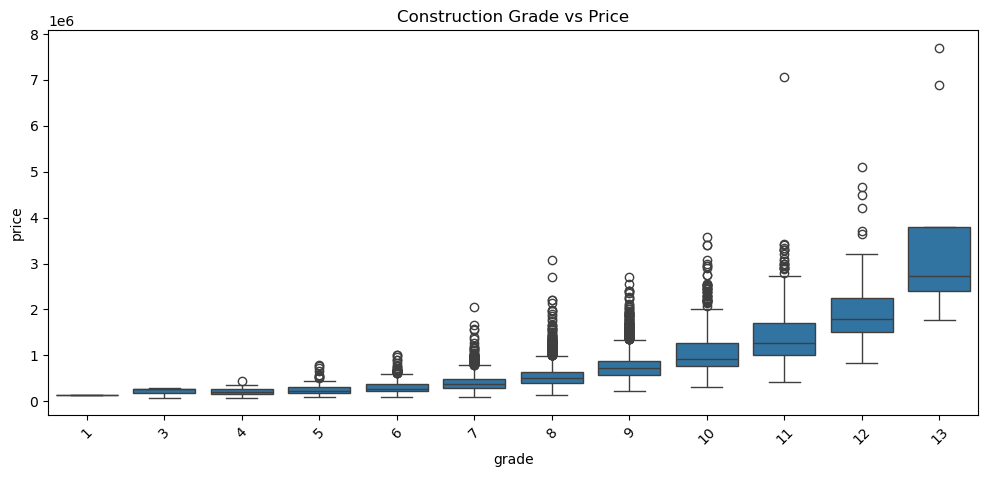

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(
    x="grade",
    y="price",
    data=train
)
plt.title("Construction Grade vs Price")
plt.xticks(rotation=45)
plt.show()

We next examine the impact of waterfront presence on property prices.

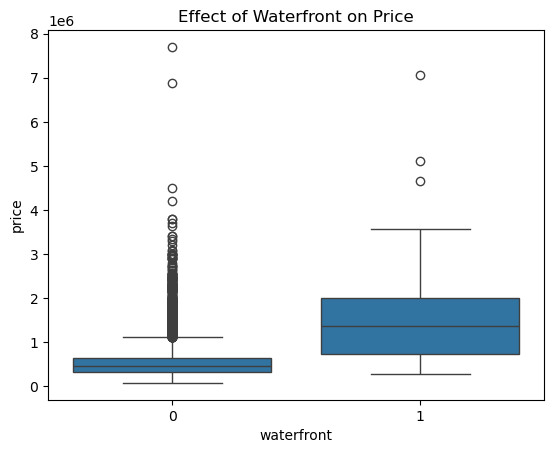

In [9]:
sns.boxplot(
    x="waterfront",
    y="price",
    data=train
)
plt.title("Effect of Waterfront on Price")
plt.show()

## 5. Geospatial Analysis

Geographic coordinates provide valuable spatial context. Visualizing price variation
across latitude and longitude helps identify regional clusters and neighborhood effects.


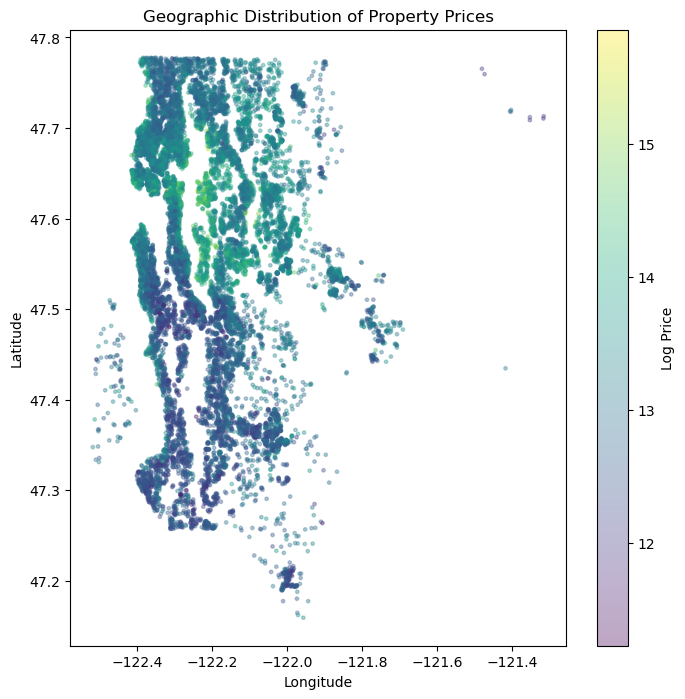

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(
    train["long"],
    train["lat"],
    c=np.log1p(train["price"]),
    cmap="viridis",
    alpha=0.35,
    s=6
)
plt.colorbar(label="Log Price")
plt.title("Geographic Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Clear geographic clusters of high and low priced properties are visible.
Even properties with similar coordinates can vary significantly in price,
motivating the use of satellite imagery to capture finer neighborhood level details.

## 6. Neighborhood-Level Features

In addition to individual property characteristics, neighborhood context
plays a crucial role in determining property value.

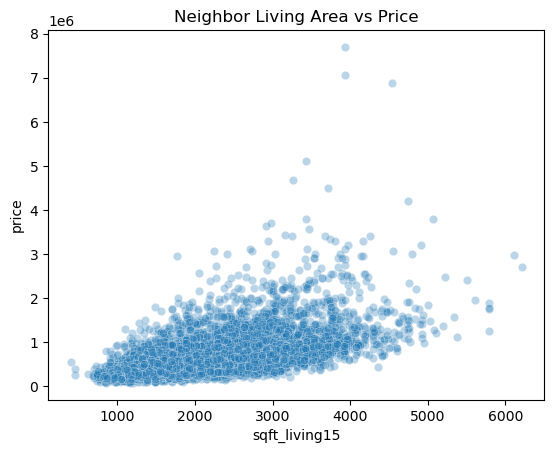

In [11]:
sns.scatterplot(
    x="sqft_living15",
    y="price",
    data=train,
    alpha=0.3
)
plt.title("Neighbor Living Area vs Price")
plt.show()

Property prices are strongly influenced by the average living area of nearby homes,
indicating that neighborhood density and surrounding development patterns matter.

## 7. Feature Correlation Analysis

We examine correlations among selected numeric features to identify multicollinearity
and guide model selection.

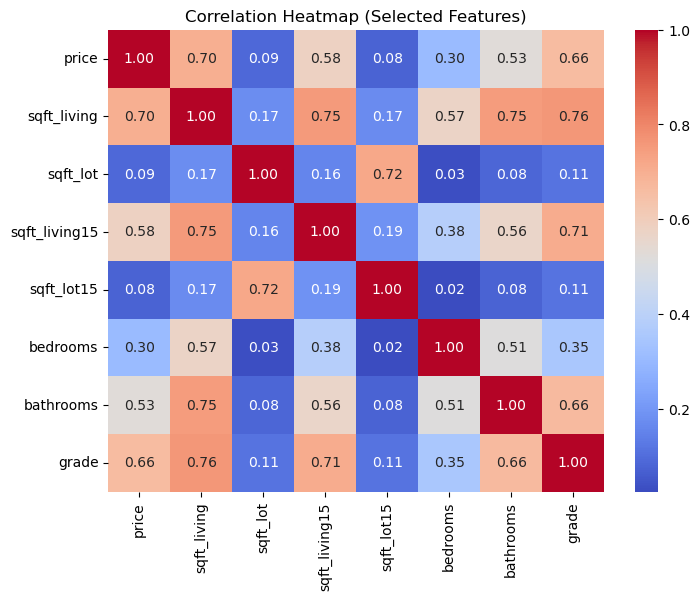

In [12]:
numeric_cols = [
    "price", "sqft_living", "sqft_lot",
    "sqft_living15", "sqft_lot15",
    "bedrooms", "bathrooms", "grade"
]

plt.figure(figsize=(8,6))
sns.heatmap(
    train[numeric_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

Several features exhibit high correlation, particularly among size-related variables.
This reinforces the suitability of tree-based models such as XGBoost,
which are robust to multicollinearity.


## 8. Stratified Sampling for Efficient Image Processing

Downloading satellite imagery for all properties is computationally expensive.
To ensure balanced representation across the price spectrum, we discretize prices into bins.

In [13]:
train["price_bin"] = pd.qcut(
    train["price"],
    q=10,
    labels=False
)

In [14]:
train["price_bin"].value_counts().sort_index()

price_bin
0    1654
1    1588
2    1623
3    1633
4    1665
5    1562
6    1628
7    1653
8    1582
9    1621
Name: count, dtype: int64

The dataset is evenly divided into price based bins, enabling stratified sampling
that preserves the overall price distribution.


We sample an equal number of properties from each price bin to create
a manageable yet representative subset for multimodal modeling.

In [15]:
SAMPLES_PER_BIN = 500

train_sampled = (
    train
    .groupby("price_bin", group_keys=False)
    .apply(
        lambda x: x.sample(n=SAMPLES_PER_BIN, random_state=42),
        include_groups=False
    )
)

In [16]:
train_sampled.shape

(5000, 21)

The resulting sampled dataset maintains diversity across low and high priced properties
while significantly reducing computational cost for satellite image processing.


## 9. Saving the Processed Dataset

The stratified subset is saved for downstream tasks including image fetching,
feature extraction, and multimodal model training.

In [17]:
train_sampled.to_csv(
    "../data/processed/train_sampled.csv",
    index=False
)

### Summary

This exploratory analysis revealed strong non linear relationships, geographic clustering,
and neighborhood effects in property prices. These insights motivated the use of
tree based models and the integration of satellite imagery to capture visual context
beyond structured attributes.